<a href="https://colab.research.google.com/github/Tatsuya3327/COVID-19-Tweet-Sentiment-Analysis/blob/main/COVID_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

# **Introduction**

This analysis starts with the basic EDA on daily COVID-19 vaccinations progress of each country and on tweets about the vaccination. The second part particularly focuses on how the polarity of tweets changes as the vaccination spread out, using a NLP library TextBlob.


## Major features used in the analysis
### country_vaccinations.csv
- date (pandas.DatetimeIndex) - a date
- country (string) - a name of a country
- daily_vaccinations (int) - daily number of vaccinations in a country

### vaccination_all_tweets.csv
- date (pandas.DatetimeIndex) - a date of a tweet
- text (string) - a text of a tweet
- user_name (string) - a username
- retweet (int) - a number of retweet for the tweet

The second part involves the following variables introduced from textblob.
- polarity (float) - a degree of feeling in a tweet, with 1 = positive, -1 = negative
- cat_polarity (int) - a category of the polarity, 1 = positive, 0 = neutral, -1 = negative
- subjectivity (float) - a degree of subjectivity in a tweet, with 1 = subjective, 0 = objective
- cat_subjectivity (int) - a category of the subjectivity, 1 = subjective, 0 = objective

# **Exploratory Data Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the datasets
tweet_path = "/content/drive/MyDrive/DataGood/Vaccination Progress and Tweets Datasets/vaccination_all_tweets.csv"
manufacture_path = "/content/drive/MyDrive/DataGood/Vaccination Progress and Tweets Datasets/country_vaccinations_by_manufacturer.csv"
country_path = "/content/drive/MyDrive/DataGood/Vaccination Progress and Tweets Datasets/country_vaccinations.csv"
tweet_df = pd.read_csv(tweet_path, index_col = "date", parse_dates = True)
manufacture_df = pd.read_csv(manufacture_path, index_col = "date", parse_dates = True)
country_df = pd.read_csv(country_path, index_col = "date", parse_dates = True)

In [ ]:
tweet_df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
date,,,,,,,,,,,,,,,
2020-12-20 06:06:44,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2020-12-13 16:27:13,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2020-12-12 20:33:45,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
2020-12-12 20:23:59,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
2020-12-12 20:17:19,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
tweet_df.info

<bound method DataFrame.info of                                       id  ... is_retweet
date                                      ...           
2020-12-20 06:06:44  1340539111971516416  ...      False
2020-12-13 16:27:13  1338158543359250433  ...      False
2020-12-12 20:33:45  1337858199140118533  ...      False
2020-12-12 20:23:59  1337855739918835717  ...      False
2020-12-12 20:17:19  1337854064604966912  ...      False
...                                  ...  ...        ...
2021-10-07 04:00:05  1445962108055732232  ...      False
2021-10-07 03:39:21  1445956889305440264  ...      False
2021-10-07 03:30:26  1445954643419226114  ...      False
2021-10-07 03:30:15  1445954599345475592  ...      False
2021-10-07 03:00:15  1445947047052333057  ...      False

[206967 rows x 15 columns]>

In [ ]:
tweet_df.shape

(206967, 15)

In [ ]:
manufacture_df.head(5)

,location,vaccine,total_vaccinations
date,,,
2021-01-08,Austria,Johnson&Johnson,0
2021-01-08,Austria,Moderna,0
2021-01-08,Austria,Oxford/AstraZeneca,0
2021-01-08,Austria,Pfizer/BioNTech,31181
2021-01-15,Austria,Johnson&Johnson,0


In [ ]:
manufacture_df.info

<bound method DataFrame.info of                   location             vaccine  total_vaccinations
date                                                              
2021-01-08         Austria     Johnson&Johnson                   0
2021-01-08         Austria             Moderna                   0
2021-01-08         Austria  Oxford/AstraZeneca                   0
2021-01-08         Austria     Pfizer/BioNTech               31181
2021-01-15         Austria     Johnson&Johnson                   0
...                    ...                 ...                 ...
2021-10-14  European Union  Oxford/AstraZeneca            67157682
2021-10-14  European Union     Pfizer/BioNTech           405805514
2021-10-14  European Union   Sinopharm/Beijing             2109883
2021-10-14  European Union             Sinovac                   8
2021-10-14  European Union           Sputnik V             1843183

[18373 rows x 3 columns]>

In [ ]:
manufacture_df.shape

(18373, 3)

In [ ]:
country_df.head(5)

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2021-02-25,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2021-02-26,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51308 entries, 2021-02-22 to 2021-10-14
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              51308 non-null  object 
 1   iso_code                             51308 non-null  object 
 2   total_vaccinations                   27900 non-null  float64
 3   people_vaccinated                    26460 non-null  float64
 4   people_fully_vaccinated              23435 non-null  float64
 5   daily_vaccinations_raw               22927 non-null  float64
 6   daily_vaccinations                   51056 non-null  float64
 7   total_vaccinations_per_hundred       27900 non-null  float64
 8   people_vaccinated_per_hundred        26460 non-null  float64
 9   people_fully_vaccinated_per_hundred  23435 non-null  float64
 10  daily_vaccinations_per_million       51056 non-null  float64
 11  vaccines   

In [ ]:
country_df.shape

(51308, 14)

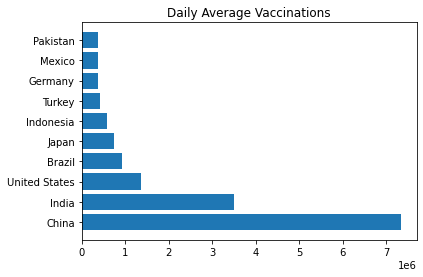

In [ ]:
average_daily_vaccine = country_df.groupby('country').mean().sort_values(by='daily_vaccinations', ascending=False)[:10]
plt.barh(y=average_daily_vaccine.index, width=average_daily_vaccine['daily_vaccinations'])
plt.title('Daily Average Vaccinations')
plt.show()

Countries with more populations and also those creating vaccinations tend to have higher numbers of daily vaccinations.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0, flags=flags)


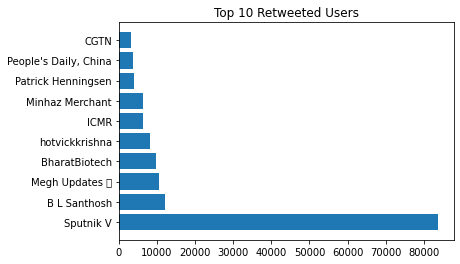

In [ ]:
users = tweet_df.groupby('user_name').sum().sort_values(by='retweets', ascending=False)[:10]
plt.barh(y=users.index, width=users['retweets'])
plt.title("Top 10 Retweeted Users")
plt.show()

Among Twitter users who tweeted about COVID vaccinations, Sputnik V received the most retweets, more than eighty thousand. The second most retweeted user is B L Santhosh with more than 10000 retweets.

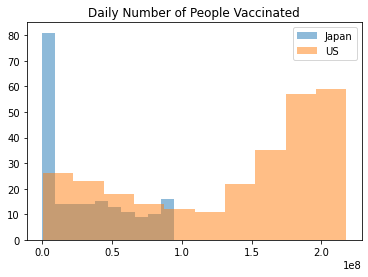

In [ ]:
japan_us = country_df[country_df['country'].isin(['Japan', 'United States'])]
plt.hist(japan_us[japan_us['country'] == 'Japan']['people_vaccinated'], alpha=0.5)
plt.hist(japan_us[japan_us['country'] == 'United States']['people_vaccinated'], alpha=0.5)
plt.legend(['Japan', 'US'], loc='upper right')
plt.title('Daily Number of People Vaccinated')
plt.show()

Japan has more days with less number of people vaccinated. This is because Japan does not produce vaccines and could not first import vaccines from producing countries.

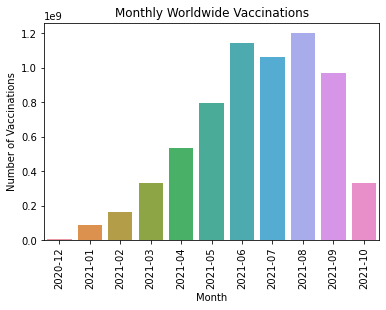

In [ ]:
# Monthly Worldwide Vaccinations 
country_df['date_month'] = pd.to_datetime(country_df.index).to_period('M')
monthly_vaccine = country_df.groupby(by = 'date_month').sum()
sns.barplot(x = monthly_vaccine.index, y = monthly_vaccine.daily_vaccinations.values)

plt.title('Monthly Worldwide Vaccinations')
plt.xlabel('Month')
plt.ylabel('Number of Vaccinations')
plt.xticks(rotation = 'vertical')
plt.show()

August has the most vaccinations all over the world, followed by June, July, and Septempber, respectively. The reason why September and October have less vaccinations than previous might be that the data collection took place during those period and there are many lacking data.

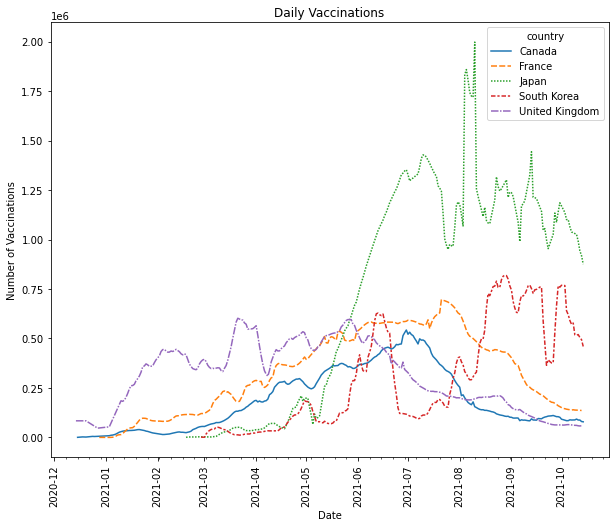

In [ ]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator()  # every week
years_fmt = mdates.DateFormatter('%Y-%m')

countries = ['Japan', 'Canada', 'United Kingdom', 'France', 'South Korea']
df = country_df[country_df['country'].isin(countries)]
vaccine_five_countries = pd.pivot_table(df, index=df.index, columns='country', values='daily_vaccinations')

fig, axes = plt.subplots(figsize = (10, 8))
sns.lineplot(data = vaccine_five_countries)
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(weeks)

plt.title('Daily Vaccinations')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.xticks(rotation = 'vertical')
plt.show()

At first, the UK, a vaccination-producing country, implemented more vaccinations each day. However, as the time goes on, Japan and South Korea came to give more people shots. 

## **Insights on EDA**
The EDA mainly focused on differences in vaccinations among countries and the hot topic on Twitter. There is a variation in daily vaccinations or in how quickly vaccination spread accross countries. These insights drive me to explore how sentiment in each country shaped as vaccinations spread out.

# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

pols = []
polcats = []
subs = []
subcats = []

for x in tweet_df.text.values:
  # address polarity and subjectivity
  pol = TextBlob(x).sentiment.polarity
  pols = np.append(pols, pol)
  sub = TextBlob(x).sentiment.subjectivity
  subs = np.append(subs, sub)

  # convert to categorical
  if pol > 0:
    polcats = np.append(polcats, 1)
  elif pol < 0:
    polcats = np.append(polcats, -1)
  else:
    polcats = np.append(polcats, 0)
  
  if sub > 0.5:
    subcats = np.append(subcats, 1)
  else:
    subcats = np.append(subcats, 0)

tweet_df['polarity'] = pols
tweet_df['cat_polarity'] = polcats
tweet_df['subjectivity'] = subs
tweet_df['cat_subjectivity'] = subcats

tweet_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,polarity,cat_polarity,subjectivity,cat_subjectivity
date,,,,,,,,,,,,,,,,,,,
2020-12-20 06:06:44,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.000,0.0,0.125000,0.0
2020-12-13 16:27:13,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.500,-1.0,0.900000,1.0
2020-12-12 20:33:45,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.000,0.0,0.033333,0.0
2020-12-12 20:23:59,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.050,-1.0,0.550000,1.0
2020-12-12 20:17:19,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.000,0.0,0.000000,0.0
2020-12-12 20:11:42,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False,0.400,1.0,0.250000,0.0
2020-12-12 20:06:00,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,-0.100,-1.0,0.500000,0.0
2020-12-12 20:04:29,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,0.675,1.0,0.587500,1.0
2020-12-12 20:01:16,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,0.000,0.0,0.000000,0.0


In [ ]:
tweet_df[tweet_df['cat_polarity'] == 1].sample(15)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,polarity,cat_polarity,subjectivity,cat_subjectivity
date,,,,,,,,,,,,,,,,,,,
2021-08-24 11:11:00,1430125485690736641,Bangladesh Student League Central,"Dhaka, Bangladesh",@Bangladesh @Students #league\n#BSL\n\nhttps:/...,2018-01-21 10:02:22,32811,247,8347,False,Ten lakh doses of #Pfizer vaccine gifted by th...,"['Pfizer', 'USA', 'Bangladesh']",Twitter for Android,0,13,False,0.250000,1.0,0.500000,0.0
2021-03-20 02:15:00,1373095699387052032,China Economy,Beijing,Latest business news and valuable information ...,2019-12-31 06:11:12,2219,144,535,True,Serbia on Mar. 18 signed a contract with #Chin...,"['China', 'Sinopharm']",Twitter Web App,4,8,False,0.500000,1.0,0.500000,0.0
2021-06-29 15:53:36,1409902881763778560,Chinese Embassy in Sri Lanka,Sri Lanka,Official twitter account of the Embassy of the...,2020-03-20 04:41:39,13170,378,1511,True,Great News!\n\nA clinical trial of #Sinovac ov...,"['Sinovac', 'vaccine']",Twitter Web App,3,17,False,0.466667,1.0,0.550000,1.0
2021-02-21 21:35:30,1363603276625772544,MirelaMonte,"Myrtle Beach, SC","Incurable Optimist, Human Rights Activist, Mot...",2008-05-16 22:34:28,7968,8428,13097,False,So #Pfizer is charging for a 6th dose which is...,['Pfizer'],Twitter for iPhone,0,1,False,0.119048,1.0,0.857143,1.0
2021-07-28 15:00:19,1420398722295287815,Ironman K,NaN,Can fly.,2021-06-30 14:15:00,0,0,2,False,Bhutan vaccinates 90% adult population in a we...,['Bhutan'],Twitter Web App,0,0,False,0.041667,1.0,0.100000,0.0
2021-03-16 08:59:29,1371747939882733568,Nanduri Srinivas,NaN,Official Twitter Handle of Director Operations...,2021-02-23 06:52:33,20,10,28,False,"Today, I received the first dose of #Covaxin, ...","['Covaxin', 'Aatmanirbhar']",Twitter Web App,8,8,False,0.488889,1.0,0.577778,1.0
2021-03-07 12:17:14,1368536214450679808,Darren van der Garry,Edinburgh Scotland,Love Beards! I like to play with the boys 🌈 lo...,2009-03-01 10:26:51,601,616,4934,False,Yay! Had my first vaccine 💉 hopefully this is ...,"['vaccination', 'oxfordastrazeneca']",Twitter for iPhone,0,1,False,0.250000,1.0,0.333333,0.0
2021-09-18 10:08:03,1439169337550520323,CoWIN Blore 18-44,"Bengaluru, India",Get instant alerts for Free/Paid slots in BBMP...,2021-06-29 09:33:13,22,0,2,False,***************** FREE *****************\n\nPi...,NaN,CowinAlertsBot,0,0,False,0.200000,1.0,0.450000,0.0
2021-08-02 21:03:19,1422302011400273924,Scott Mackay 🇨🇦 🏃‍♂️ ☕️ 🍷 8⃣0⃣ 🎵,Canada,Proud East Coaster | Avid Runner | Vegan | UPE...,2012-01-12 19:31:36,729,769,15511,False,A very good point below (re: vaccines that are...,NaN,Twitter Web App,0,1,False,0.455000,1.0,0.590000,1.0


Most of them looks positive but there's some not positive such as "An 89-year-old man died just days after receiving..."

In [ ]:
tweet_df[tweet_df['cat_polarity'] == 0].sample(15)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,polarity,cat_polarity,subjectivity,cat_subjectivity
date,,,,,,,,,,,,,,,,,,,
2021-06-01 08:23:54,1399642852448104449,SKW Investment Adviser,Bangalore,SKW Investment Adviser pure play financial adv...,2019-07-20 06:48:46,386,438,1,False,Dr. Reddy's is in talks with the Indian govern...,NaN,Twitter Web App,0,0,False,0.0,0.0,0.375,0.0
2021-04-13 15:15:04,1381989320303775746,EURACTIV,Brussels,EU news & policy debates from the European Med...,2008-05-17 05:33:45,137814,3130,3918,True,"🇸🇰 Russia criticised Slovak scientists who ""da...",['SputnikV'],Sprout Social,0,4,False,0.0,0.0,0.000,0.0
2021-06-11 14:07:57,1403353311290433536,India TV,India,India’s most watched Hindi News Channel. Follo...,2009-04-22 11:26:34,1687026,43,392,True,We respect #US's decision: Centre on #Covaxin ...,"['US', 'Covaxin']",Twitter Web App,1,26,False,0.0,0.0,0.000,0.0
2021-03-01 04:11:31,1366239653720846336,IndiaToday,India,"Brings you news breaks: Exclusive political, e...",2009-02-02 07:21:54,5543935,251,4439,True,Are you eligible to get vaccine ?? How to get ...,NaN,Twitter Media Studio - LiveCut,2,17,False,0.0,0.0,0.000,0.0
2021-05-31 13:59:13,1399364848664854533,𝕱𝖆𝖙𝖎𝖍 𝕾𝖚𝖑𝖙𝖆𝖓 𝕸𝖊𝖍𝖒𝖊𝖉 𝕳𝖆𝖓 ☝🏿﷽,﷽ فَاَيْنَ تَذْهَبُونَ,﷽ İşte onun için sen (tevhide) dâvet et ve emr...,2013-06-01 16:01:51,2403,2385,319910,False,Do you want to be a tester slave?\nKIDS AREN'T...,"['Plandemi', 'Plandemic', 'Kobay', 'Tester', '...",Twitter for Android,0,0,False,0.0,0.0,0.000,0.0
2021-06-11 14:37:25,1403360726484275201,OverSeasRights.Com,United States,https://t.co/nhWGfp5gDQ is a News Portal Based...,2018-05-05 05:58:39,7108,0,575,False,Even US FDA has denied emergency use authorisa...,['Covaxin'],Twitter for Android,3,9,False,0.0,0.0,0.000,0.0
2021-06-23 06:42:15,1407589802531115010,CowinBangalore,NaN,Follow us to get update as soon as 18 plus vac...,2021-05-17 18:56:45,1116,2,57,False,"560054, \nAGE 45+\n21-D1, 49-D2 slots,\n#COVAX...","['COVAXIN', 'BBMP']",cowin_vaccine_app,0,0,False,0.0,0.0,0.000,0.0
2021-08-12 17:45:56,1425876216133787649,JayJayWind,NaN,Rocket 🚀,2021-03-06 19:19:51,5,61,480,False,@WHO We need #covaxin $ocgn to protect us,['covaxin'],Twitter for Android,1,2,False,0.0,0.0,0.000,0.0
2021-10-02 14:44:05,1444312233551417349,CoWIN Blore 18-44,"Bengaluru, India",Get instant alerts for Free/Paid slots in BBMP...,2021-06-29 09:33:13,21,0,2,False,Pincode: 560098\nCOVAXIN - Dose 2: 40 slots\n\...,NaN,CowinAlertsBot,0,0,False,0.0,0.0,0.100,0.0


Look like they mostly consist of neutral comments. They tend to be simple report or anouncement.

In [ ]:
tweet_df[tweet_df['cat_polarity'] == -1].sample(15)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,polarity,cat_polarity,subjectivity,cat_subjectivity
date,,,,,,,,,,,,,,,,,,,
2021-04-13 18:08:16,1382032908282601477,Victor Welch,Los Angeles,"Dilettante of markets, science, philosophy, po...",2012-11-12 23:51:51,58,37,110,False,Vaccines take a decade in clinical trials for ...,NaN,Twitter Web App,0,0,False,-0.144444,-1.0,0.488889,0.0
2021-06-17 12:47:49,1405507474325659654,Middle East Online,NaN,NaN,2020-01-06 15:40:39,242,1,0,False,#UAE launches #Sinopharm vaccine trial for chi...,"['UAE', 'Sinopharm']",TweetDeck,0,1,False,-0.100000,-1.0,0.400000,0.0
2021-04-05 04:41:35,1378930794266255362,Majeed Lashari,"Lahore, Pakistan",Lawyer. Activist. Lecturer @LondonU LLB. Colum...,2011-09-05 15:28:26,749,183,239,False,Let’s turn the tide ! One down one to go ! 😎\n...,"['Vaccinated', 'SputnikV', 'firstjab', 'pandem...",Twitter for iPhone,0,3,False,-0.194444,-1.0,0.288889,0.0
2021-08-13 02:43:16,1426011442885451778,Biyanta Samaddar🇮🇳,"West Bengal, Kolkata",Hospitality professional,2021-05-30 16:22:33,15,460,1546,False,@Suraj08296631 @WittyRighter_29 @SuchitraElla ...,NaN,Twitter for Android,0,0,False,-0.062500,-1.0,0.125000,0.0
2021-02-26 00:59:08,1365104075130482694,Joanna Yeung,New York City,Yeung at heart ✨✨✨ |\nRisca Lab |\nCo-founder ...,2020-02-09 04:11:26,78,181,280,False,Questions answered: \n1. How was a vaccine dev...,NaN,Twitter Web App,0,0,False,-0.106250,-1.0,0.493750,0.0
2021-04-01 08:07:51,1377533153389203458,Abhishek Srivastava,Mumbai,NaN,2010-01-06 14:32:15,206,96,3167,False,Hanuman ji is now all set to take a long journ...,NaN,Twitter Web App,1,0,False,-0.025000,-1.0,0.200000,0.0
2021-04-21 13:08:47,1384856643465265152,Shen Shiwei沈诗伟,"Beijing, China","Report BRI,Africa,CPEC; Africa fellow in Univ;...",2012-05-23 02:53:47,33406,4302,2829,True,Sinovac CEO Yin Weidong: At least 160 million ...,['Sinovac'],Twitter Web App,7,28,False,-0.300000,-1.0,0.400000,0.0
2021-02-28 14:48:31,1366037572305244161,Tim Gosling,"Prague, Czech Republic",Journalist #CEE @AJEnglish @BalkanInsight @dwn...,2014-08-25 13:55:29,1412,716,543,False,#Czech PM Babis is changing his mind again on ...,"['Czech', 'Russia', 'SputnikV']",Twitter Web App,1,2,False,-0.187500,-1.0,0.500000,0.0
2021-06-17 22:45:11,1405657806338932746,Faceless Man,NaN,Faceless Man,2014-02-10 02:39:44,129,178,547,False,@Pickledfins @hapster85 @Concerned_Daily @theR...,NaN,Twitter Web App,0,1,False,-0.100000,-1.0,0.250000,0.0


Look like the sample correctly has tweets with negative polarity.

In [ ]:
tweet_df[tweet_df['cat_subjectivity'] == 1].sample(15)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,polarity,cat_polarity,subjectivity,cat_subjectivity
date,,,,,,,,,,,,,,,,,,,
2021-08-19 15:04:48,1428372382163611652,Mr. Hough,"Bunker Hill, WV",NaN,2013-05-11 15:06:18,99,608,419,False,@POTUS Bring #Covaxin The only vaccine in the ...,"['Covaxin', 'DeltaVariant']",Twitter for iPhone,0,0,False,0.300000,1.0,0.900000,1.0
2021-05-14 07:00:09,1393098794338816001,TheFinancialDistrict,"Quezon City, Philippines",TFD is an online finance and business news sou...,2020-03-09 05:24:06,153,463,11,False,"Seychelles, the world’s most vaccinated nation...",NaN,Hootsuite Inc.,0,0,False,0.450000,1.0,0.700000,1.0
2021-08-23 17:12:57,1429854184476581915,डॉक्टर घुंघरू सेठ🗨️,love to serve humanity.,RT not endorsement. 🚩🚩 #ProudBhakt #Nationalis...,2012-06-23 11:26:39,957,1503,93201,False,"Ironically, Chinese vaccines with only 52-55% ...",['COVAXIN'],Twitter for Android,1,3,False,-0.041667,-1.0,0.583333,1.0
2021-10-09 06:13:22,1446720422247079938,Metabolic Health,Backup Acc👉 @MetaboHealth,"Promoting Health, Well-Being & Quality of Life...",2011-12-09 02:14:21,2372,117,626,False,Donald Trump and Joe Biden can't save you from...,['Moderna'],Twitter for Android,1,6,False,0.000000,0.0,1.000000,1.0
2021-03-05 13:20:19,1367827313790914562,Linda Newmai,Delhi & North East,BJP worker since 1991. National Executive Memb...,2013-04-19 19:55:38,5780,147,45342,False,Proud of India’s achievement on fight against ...,['COVID19'],Twitter for iPhone,78,15,False,0.800000,1.0,1.000000,1.0
2021-08-05 14:19:16,1423287491931508744,NYCFreespirit Got Vaxed Still Masked,NaN,My romp through life in the city I work and pl...,2008-09-17 15:42:29,135,372,18918,False,And……the vaccine winner in terms of efficacy i...,['Moderna'],Twitter for iPhone,0,0,False,0.400000,1.0,0.550000,1.0
2021-08-13 17:11:14,1426229871567589380,Spring Revolution Rangoon (RoyalYZ),Yangon,NaN,2020-04-24 19:18:20,118,84,1451,False,An 89-year-old man died just days after receiv...,['Sinopharm'],Twitter for iPhone,0,0,False,0.700000,1.0,0.600000,1.0
2021-05-19 15:51:11,1395044369820831744,Anmol Kumar,NaN,Thinker here✋,2015-05-26 03:03:36,2,5,33,False,Haven't seen so lazy government till now. @drh...,NaN,Twitter Web App,0,0,False,-0.250000,-1.0,1.000000,1.0
2021-04-07 10:03:20,1379736543489896448,Barny Shergold,Steeple Morden,Just a normal British bloke. Take a satirical ...,2009-12-19 00:36:41,384,550,225,False,Wow. The Moderna vaccine is now available in t...,NaN,Twitter Web App,0,1,False,0.283333,1.0,0.577778,1.0


They are correctly subjective comments such as individuals' vaccination reports or reply to others.



In [ ]:
tweet_df[tweet_df['cat_subjectivity'] == 0].sample(15)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,polarity,cat_polarity,subjectivity,cat_subjectivity
date,,,,,,,,,,,,,,,,,,,
2021-03-09 17:10:29,1369334788356726785,Tim Quigley,"Athens, GA",Assoc. Prof. of Management @universityofga but...,2009-04-16 01:03:59,231,536,1138,False,"First, the feds report total doses allocated t...",NaN,Twitter Web App,0,0,False,0.083333,1.0,0.383333,0.0
2021-09-16 04:33:24,1438360347350503427,CoWIN Blore 18-44,"Bengaluru, India",Get instant alerts for Free/Paid slots in BBMP...,2021-06-29 09:33:13,22,0,2,False,Pincode: 560077\nCOVAXIN - Dose 2: 20 slots\n\...,NaN,CowinAlertsBot,0,0,False,0.000000,0.0,0.100000,0.0
2021-03-16 11:17:17,1371782618451169291,Shane Woodford,"Faaborg, Denmark",Freelance journalist in the EU. Formerly News ...,2010-08-03 05:31:34,13314,2729,2166,False,#Moderna has begun first doses in #COVID19 vac...,"['Moderna', 'COVID19']",Twitter for iPad,4,0,False,0.061111,1.0,0.200000,0.0
2021-04-01 02:29:22,1377447969541091334,Ma,NaN,NaN,2009-02-12 18:59:47,87,789,6776,False,@Suhasagri @samar11 @Aakar__Patel Let’s all ta...,['Covaxin'],Twitter for iPhone,1,0,False,0.000000,0.0,0.000000,0.0
2021-06-11 12:50:00,1403333695365279746,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,568975,154,1989,True,Tema: A batch of #SputnikV arrives in #Albania...,"['SputnikV', 'Albania']",TweetDeck,26,177,False,0.000000,0.0,0.000000,0.0
2021-08-07 18:31:25,1424075723778584582,CoWIN Blore 18-44,"Bengaluru, India",Get instant alerts for Free/Paid slots in BBMP...,2021-06-29 09:33:13,20,0,1,False,Pincode: 560066\nCOVAXIN - Dose 2: 20 slots\n\...,NaN,CowinAlertsBot,0,0,False,0.000000,0.0,0.100000,0.0
2021-02-27 01:15:00,1365470454417293313,China Economy,Beijing,Latest business news and valuable information ...,2019-12-31 06:11:12,2099,142,535,True,A batch of #Sinopharm's COVID-19 #vaccine aide...,"['Sinopharm', 'vaccine', 'China', 'Algeria']",Twitter Web App,2,5,False,0.000000,0.0,0.000000,0.0
2021-05-23 18:16:56,1396530603290398725,Nobody,NaN,"Just a common man..\n""I am alive today, one mo...",2021-05-21 18:09:14,2,40,4,False,"@Reuters #Pfizer #AstraZenaca #Moderna , anoth...","['Pfizer', 'AstraZenaca', 'Moderna']",Twitter Web App,0,0,False,0.000000,0.0,0.125000,0.0
2021-07-08 19:04:43,1413212467971252224,vttyks 嘰嘰喳喳,NaN,牢記\n法輪大法好 真善忍好 \nRemember\nFalun Dafa is Good....,2010-03-14 19:51:52,207,1901,1275,False,#WorldCoronavirusPandemic 🧐 #Thailand 🇹🇭\n\n#C...,"['WorldCoronavirusPandemic', 'Thailand', 'CCPV...",Twitter Web App,0,0,False,0.000000,0.0,0.000000,0.0


There are many individuals' vaccination reports as was in the subjective tweets, so it seems it does not classify well.

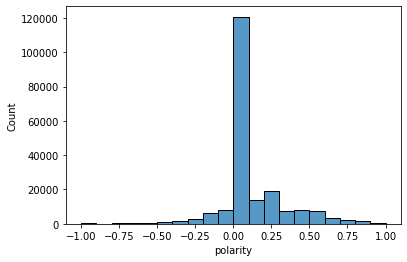

In [ ]:
# non-DatetimeIndex version
tweets = pd.read_csv(tweet_path)
tweets['polarity'] = tweet_df['polarity'].values
tweets['cat_polarity'] = tweet_df['cat_polarity'].values
tweets['subjectivity'] = tweet_df['subjectivity'].values
tweets['cat_subjectivity'] = tweet_df['cat_subjectivity'].values

sns.histplot(x = tweets['polarity'], bins=np.arange(-1, 1.05, 0.1))
plt.show()

Similar to YouTube comments, there are mainly neutral tweets and the graph is left-skewed. It might be bcause the polarity dictionary might contain more postive words than negative ones.

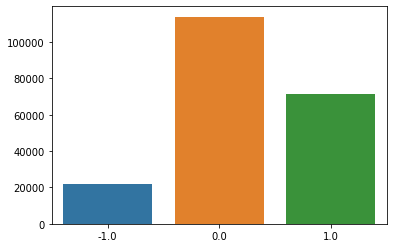

In [ ]:
indices = tweets['cat_polarity'].value_counts().index
counts = tweets['cat_polarity'].value_counts().values
sns.barplot(x = indices, y = counts)
plt.show()

As opposed to what was seen in YouTube comments, the biggest group in COVID-19 tweets is neutral polarity, which correctly reflects the histogram. And the smallest group is the negative one.

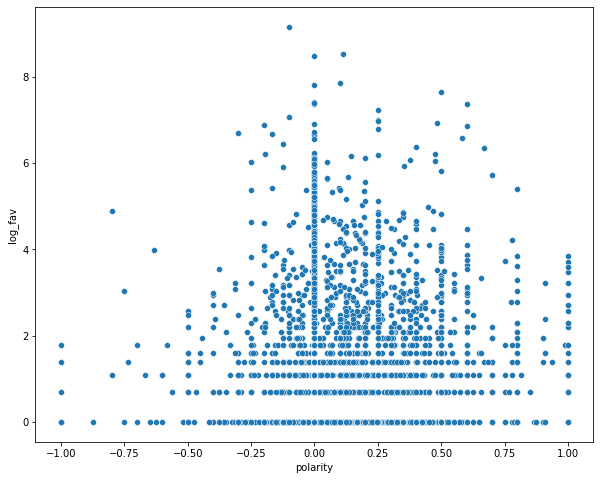

In [ ]:
# scatter plot of favorites and polarity
tweets['log_fav'] = tweets['favorites'].apply(lambda x: np.log(x))
plt.figure(figsize=(10, 8))
sns.scatterplot(data = tweets.sample(10000), x = 'polarity', y = 'log_fav')
plt.show()

The scatter plot of logarithmic favorites vs polarity also reflects what happened on the histogram of the polarity. Neutral comments have the most favorites probably because of its size.

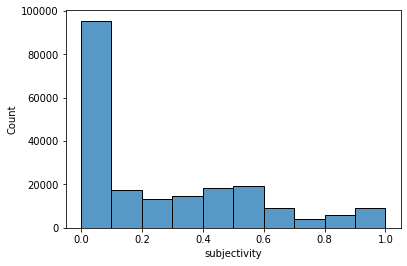

In [ ]:
sns.histplot(x = tweets['subjectivity'], bins=np.arange(0, 1.05, 0.1))
plt.show()

The majority is the objective comments in the tweets, as opposed to my guess.

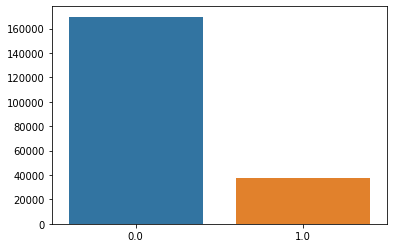

In [ ]:
cats = tweets['cat_subjectivity'].value_counts().index
value_counts = tweets['cat_subjectivity'].value_counts().values
sns.barplot(x = cats, y = value_counts)
plt.show()

The proportion of subjectivity in the dataset is tilted onto the objective group like its histogram.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


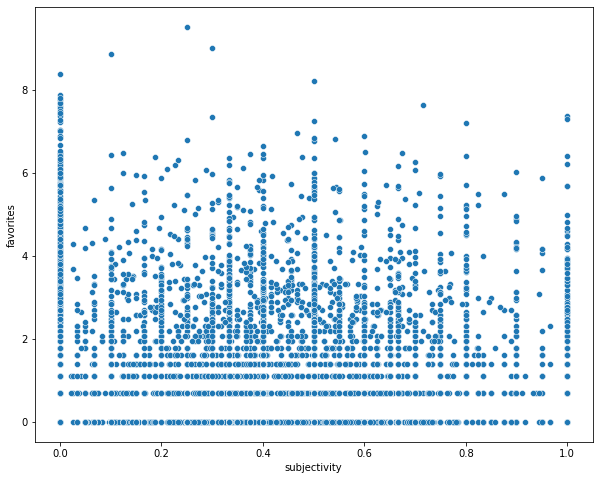

In [ ]:
# make the proportion [0.5, 0.5]
subjective = tweets[tweets['cat_subjectivity'] == 1]
balanced_subjectivity = pd.concat([subjective, tweets[tweets['cat_subjectivity'] == 0].sample(len(subjective))]).sample(frac=1)

plt.figure(figsize=[10, 8])
sns.scatterplot(x=tweets['subjectivity'].sample(20000), y=np.log(tweets['favorites']))
plt.show()

With the balanced subjectivity dataset, there is no correlation between subjectivity and the number of favorites.

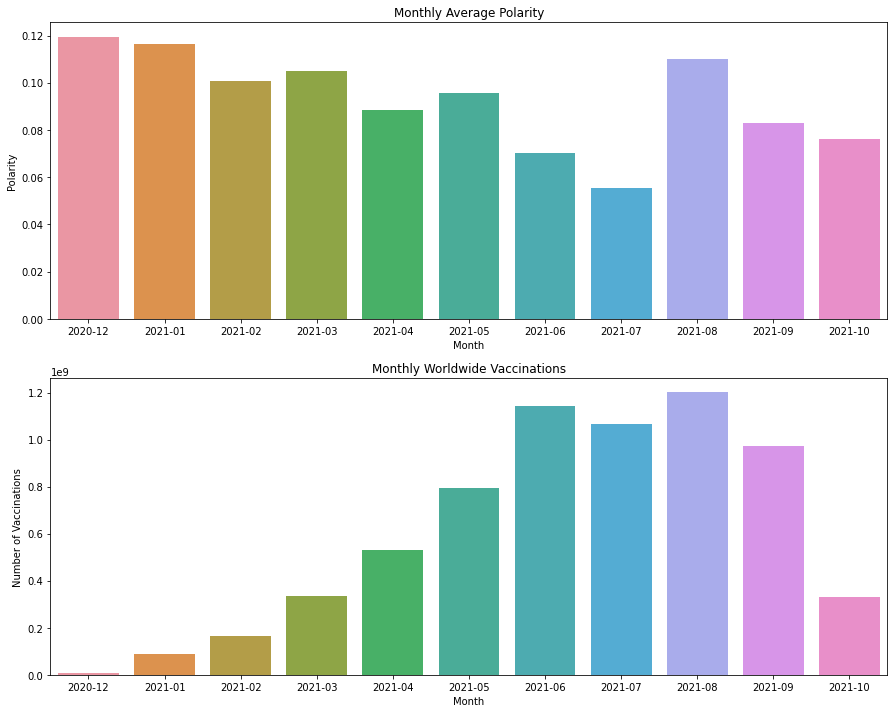

In [ ]:
tweet_df['date_month'] = pd.to_datetime(tweet_df.index).to_period('M')
monthly_polarity = tweet_df.groupby(by='date_month').mean()

fig, ax = plt.subplots(2, 1, figsize=(15, 12))
sns.barplot(x = monthly_polarity.index, y = monthly_polarity.polarity.values, ax=ax[0])
ax[0].set_title('Monthly Average Polarity')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Polarity')
sns.barplot(x = monthly_vaccine.index, y = monthly_vaccine.daily_vaccinations.values, ax=ax[1])
ax[1].set_title('Monthly Worldwide Vaccinations')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Vaccinations')
plt.show()

There seems to be some association between the polarity and the spread of the vaccinations. When the number of vaccinations is high, polarity goes down, meaning that people tweets with more fear, sad, anxious sentiment.

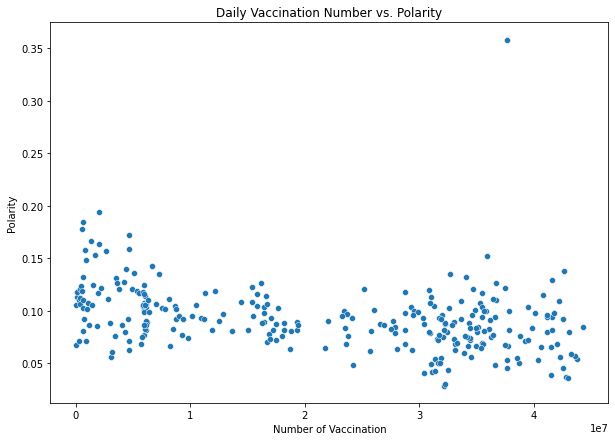

In [ ]:
tweet_df['date_day'] = tweet_df.index.date
daily_polarity = tweet_df.groupby(by='date_day').mean()
daily_vaccine = country_df.groupby(by=country_df.index.date).sum()
daily_pol_vac = pd.concat([daily_polarity, daily_vaccine], axis=1)[['polarity', 'daily_vaccinations']]
plt.subplots(figsize=(10, 7))
sns.scatterplot(data = daily_pol_vac, x='daily_vaccinations', y='polarity')
plt.title('Daily Vaccination Number vs. Polarity')
plt.xlabel('Number of Vaccination')
plt.ylabel('Polarity')
plt.show()

The scatter plot between the number of vaccination and the polarity on the same day shows the negative linear relationship except one outlier.

In [ ]:
# Daily Correlation
daily_corr = daily_pol_vac.corr()['polarity'][1]

# Weekly Correlation
tweet_df['date_week'] = pd.to_datetime(tweet_df.index).to_period('W')
weekly_polarity = tweet_df.groupby(by='date_week').mean()[['polarity']]
country_df['date_week'] = pd.to_datetime(country_df.index).to_period('W')
weekly_vaccine = country_df.groupby(by='date_week').sum()[['daily_vaccinations']]
weekly_pol_vac = pd.concat([weekly_polarity, weekly_vaccine], axis=1)
weekly_corr = weekly_pol_vac.corr()['polarity'][1]

# Monthly Correlation
monthly_corr = np.corrcoef(monthly_polarity['polarity'], monthly_total['daily_vaccinations'])[0][1]

corrs = pd.DataFrame({'Period': ['Daily', 'Weekly', 'Monthly'], 'Correlation': [daily_corr, weekly_corr, monthly_corr]}).set_index('Period')
corrs

,Correlation
Period,
Daily,-0.358921
Weekly,-0.512263
Monthly,-0.578622


The correlation coefficients between two variables in three different periods all shows the negative relationship, with the strongest -0.58 in monthly. More people might have been got nervous as they were about to get vaccination and tweeted something negative.

# **Conclusion**
Through the sentiment analysis, it turned out that there is a negative association between the number of vaccinations and polarity on tweets about vaccinations. The association increases as we adopt longer periods (day, week, month), indicating the generalization of the associations.

However, as we found earlier, the textblob polarity does not perfectly reflect true sentiments on Tweets, and hence, the true sentiments and the daily vaccinations might not have association. In addition, most tweets are categorized as neutral, and positve and negative tweets are minority, and then the average polarity might not represent majority's sentiment correctly.